# Importing Library

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import pandas as pd


import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
#from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet

from math import sqrt

import matplotlib
#matplotlib.rcParams['axes.labelsize'] = 14
#matplotlib.rcParams['xtick.labelsize'] = 12
#matplotlib.rcParams['ytick.labelsize'] = 12
#matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [1]:
pip install statsmodels

^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.9 MB 4.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.9 MB 2.4 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.9 MB 1.9 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.9 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.9 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/9.9 MB 1.6 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/9.9 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.9 MB 1.5 MB/s eta 0:00:05
   ------------- -------------------------- 3.4/9.9 MB 1.5 MB/s eta 0:00:05
   ------------- -------------------------- 3.4/9.9 MB 1.5 MB/s eta 0:00:05
   --------------- -------

# Importing Data

Loading data of Gold and Silver on Monthly Basis from Investing.com. Data worth of past 10 years (start date:03/05/2010, end date: 03/05/2020),

In [2]:
#Loading data of Gold and Silver on Monthly Basis

headers = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change%'] 
parse_dates = ['Date']

silver = pd.read_csv(r'D:\MLPROJECTS\MoneyVest\Silver\Silver Futures Historical Data.csv', parse_dates=parse_dates,encoding ='utf-8')
silver.columns= headers

In [3]:
print ("Silver commodity has {} observations & {} features".format(*silver.shape))

Silver commodity has 730 observations & 7 features


Creating a new dataframe having (only Date and Price of Gold futures)

In [4]:
# Create the pandas DataFrame 
df = pd.DataFrame(silver, columns = ['Date', 'Price'])
df.head()

,Date,Price
0,"May 01, 2020",14.905
1,"Apr 30, 2020",15.005
2,"Apr 29, 2020",15.410
3,"Apr 28, 2020",15.188
4,"Apr 27, 2020",15.242


In [5]:
df.head(2)

,Date,Price
0,"May 01, 2020",14.905
1,"Apr 30, 2020",15.005


In [6]:
df.describe()

,Price
count,730.000000
mean,16.317507
std,1.194653
min,11.735000
25%,15.312000
50%,16.353500
75%,17.245750
max,19.682000


In [7]:
df.describe()

,Price
count,730.000000
mean,16.317507
std,1.194653
min,11.735000
25%,15.312000
50%,16.353500
75%,17.245750
max,19.682000


In [8]:
from IPython.display import display
display(df[:10].T)

,0,1,2,3,4,5,6,7,8,9
Date,"May 01, 2020","Apr 30, 2020","Apr 29, 2020","Apr 28, 2020","Apr 27, 2020","Apr 26, 2020","Apr 24, 2020","Apr 23, 2020","Apr 22, 2020","Apr 21, 2020"
Price,14.905,15.005,15.41,15.188,15.242,15.365,15.355,15.357,15.283,14.977


# Data Preprocessing and Visualization 

#### Converting to datetime format:



In [9]:
print(df['Date'].unique())


['May 01, 2020' 'Apr 30, 2020' 'Apr 29, 2020' 'Apr 28, 2020'
 'Apr 27, 2020' 'Apr 26, 2020' 'Apr 24, 2020' 'Apr 23, 2020'
 'Apr 22, 2020' 'Apr 21, 2020' 'Apr 20, 2020' 'Apr 19, 2020'
 'Apr 17, 2020' 'Apr 16, 2020' 'Apr 15, 2020' 'Apr 14, 2020'
 'Apr 13, 2020' 'Apr 12, 2020' 'Apr 10, 2020' 'Apr 09, 2020'
 'Apr 08, 2020' 'Apr 07, 2020' 'Apr 06, 2020' 'Apr 05, 2020'
 'Apr 03, 2020' 'Apr 02, 2020' 'Apr 01, 2020' 'Mar 31, 2020'
 'Mar 30, 2020' 'Mar 29, 2020' 'Mar 27, 2020' 'Mar 26, 2020'
 'Mar 25, 2020' 'Mar 24, 2020' 'Mar 23, 2020' 'Mar 22, 2020'
 'Mar 20, 2020' 'Mar 19, 2020' 'Mar 18, 2020' 'Mar 17, 2020'
 'Mar 16, 2020' 'Mar 15, 2020' 'Mar 13, 2020' 'Mar 12, 2020'
 'Mar 11, 2020' 'Mar 10, 2020' 'Mar 09, 2020' 'Mar 08, 2020'
 'Mar 06, 2020' 'Mar 05, 2020' 'Mar 04, 2020' 'Mar 03, 2020'
 'Mar 02, 2020' 'Mar 01, 2020' 'Feb 28, 2020' 'Feb 27, 2020'
 'Feb 26, 2020' 'Feb 25, 2020' 'Feb 24, 2020' 'Feb 23, 2020'
 'Feb 21, 2020' 'Feb 20, 2020' 'Feb 19, 2020' 'Feb 18, 2020'
 'Feb 17, 2020' 'Feb 16,

In [10]:
df['Date'] = df['Date'].str.extract(r'(\w{3} \d{2})')  # Extract only "Jan 20" format
df['Date'] = pd.to_datetime(df['Date'], format='%b %y', errors='coerce')

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')


#### Setting index as the datetime column for easier manipulations:

In [11]:
y = df.set_index('Date')

In [12]:
y.index

DatetimeIndex(['2001-05-01', '2030-04-01', '2029-04-01', '2028-04-01',
               '2027-04-01', '2026-04-01', '2024-04-01', '2023-04-01',
               '2022-04-01', '2021-04-01',
               ...
               '2011-01-01', '2010-01-01', '2009-01-01', '2008-01-01',
               '2007-01-01', '2005-01-01', '2004-01-01', '2003-01-01',
               '2002-01-01', '2001-01-01'],
              dtype='datetime64[ns]', name='Date', length=730, freq=None)

In [13]:
y.isnull().sum()

Price    0
dtype: int64

# Non-Stationary time series of Gold

In [14]:
stationary_check_silver = silver.set_index(['Date'])
stationary_check_silver_price = stationary_check_silver['Price']

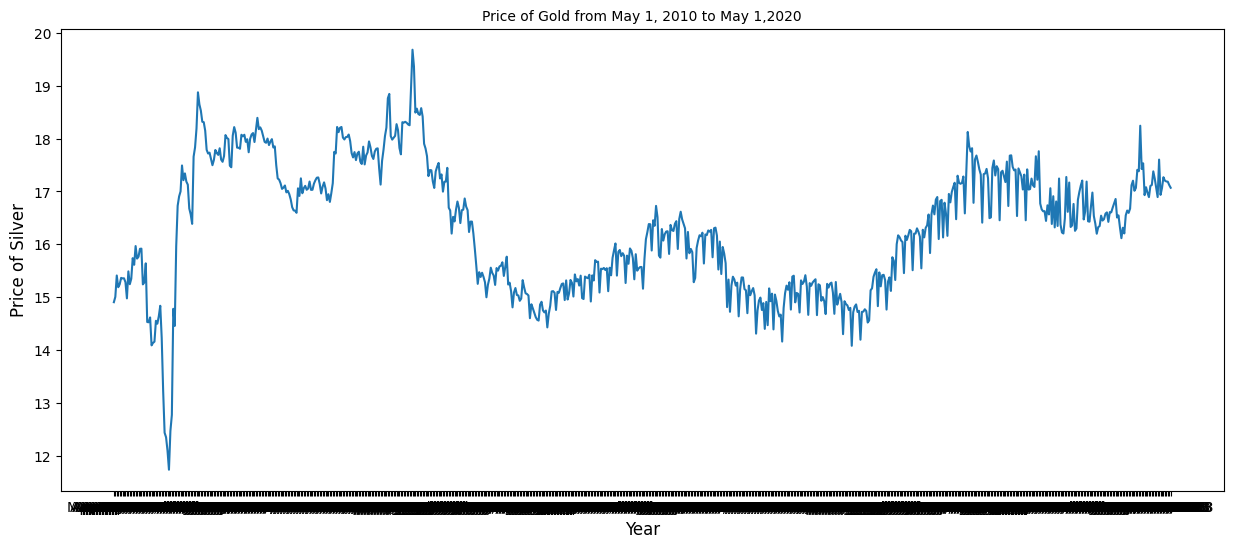

In [15]:
plt.plot(stationary_check_silver_price)
plt.ylabel('Price of Silver', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Price of Gold from May 1, 2010 to May 1,2020', fontsize=10)
plt.show()

#### Reviewing plots of the density of observations can provide further insight into the structure of the data:

The distribution is not perfectly Gaussian (normal distribution).                                                               
The distribution is left shifted.                                                                                               
Transformations might be useful prior to modelling.                                                                             

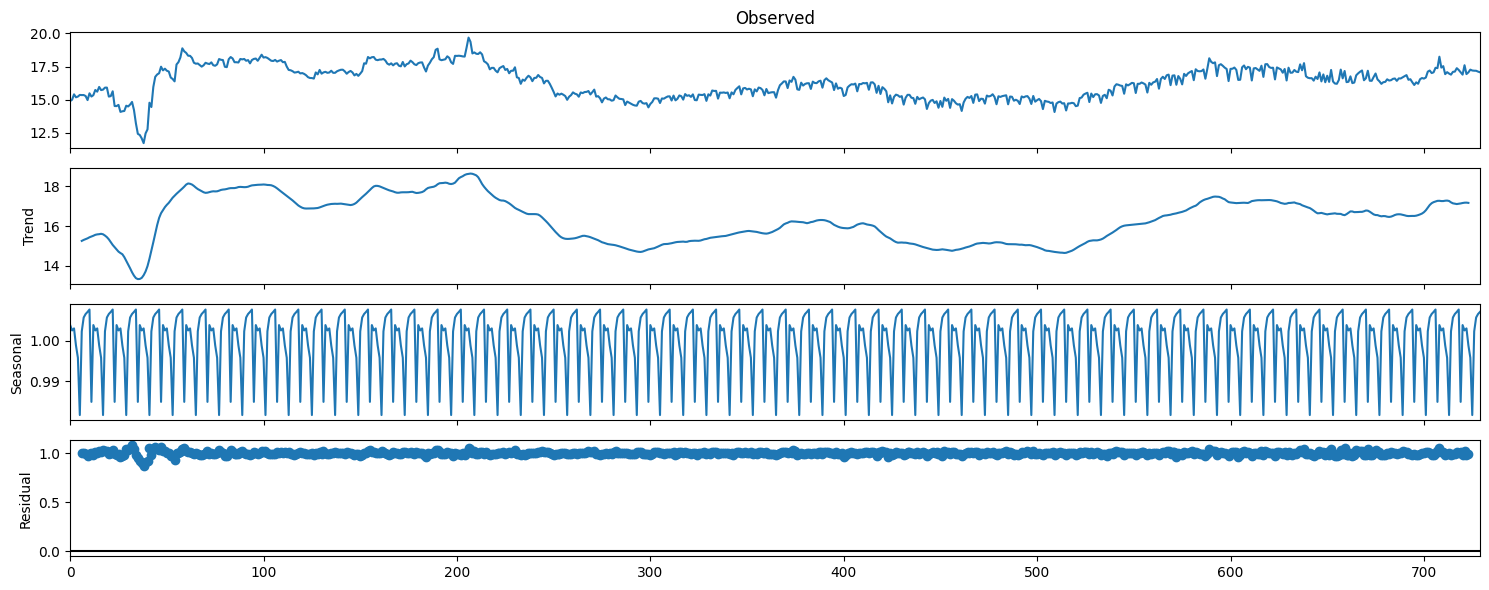

In [16]:
import statsmodels.api as sm

# Multiplicative decomposition with the correct argument
res = sm.tsa.seasonal_decompose(stationary_check_silver_price.values, period=12, model="multiplicative")

# Plot the decomposition
fig = res.plot()


# Box and Whisker Plots:

Median values across years confirms an upwards trend.                                                                           
Steady increase in the spread, or middle 50% of the data (boxes) over time

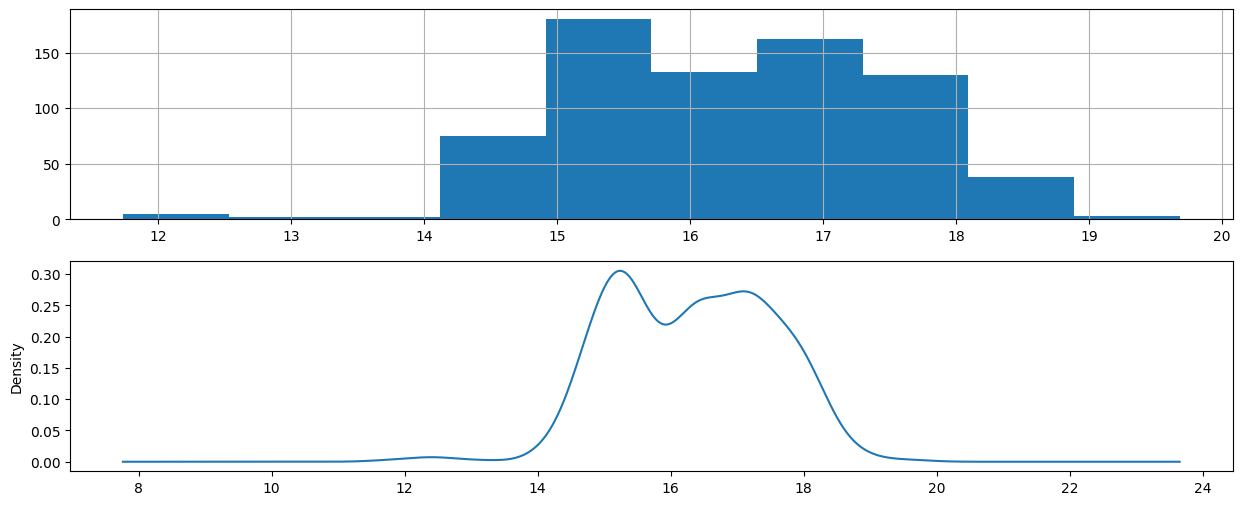

In [17]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
stationary_check_silver_price.hist()
pyplot.subplot(212)
stationary_check_silver_price.plot(kind='kde')
pyplot.show()

In [18]:
stationary_check_silver_price.index = pd.to_datetime(stationary_check_silver_price.index, format='mixed', errors='coerce')


In [19]:
stationary_check_silver_price.index = pd.to_datetime(stationary_check_silver_price.index, format='%b %d, %Y', errors='coerce')


In [21]:
print(type(stationary_check_silver_price))


<class 'pandas.core.series.Series'>


In [22]:
stationary_check_silver_price = stationary_check_silver_price.to_frame()
print(stationary_check_silver_price.columns)


Index(['Price'], dtype='object')


In [23]:
stationary_check_silver_price = stationary_check_silver_price.reset_index()
stationary_check_silver_price['Date'] = pd.to_datetime(stationary_check_silver_price['Date'], errors='coerce')
stationary_check_silver_price.set_index('Date', inplace=True)


In [24]:
print(stationary_check_silver_price.columns)


Index(['Price'], dtype='object')


<Axes: xlabel='Date', ylabel='Price'>

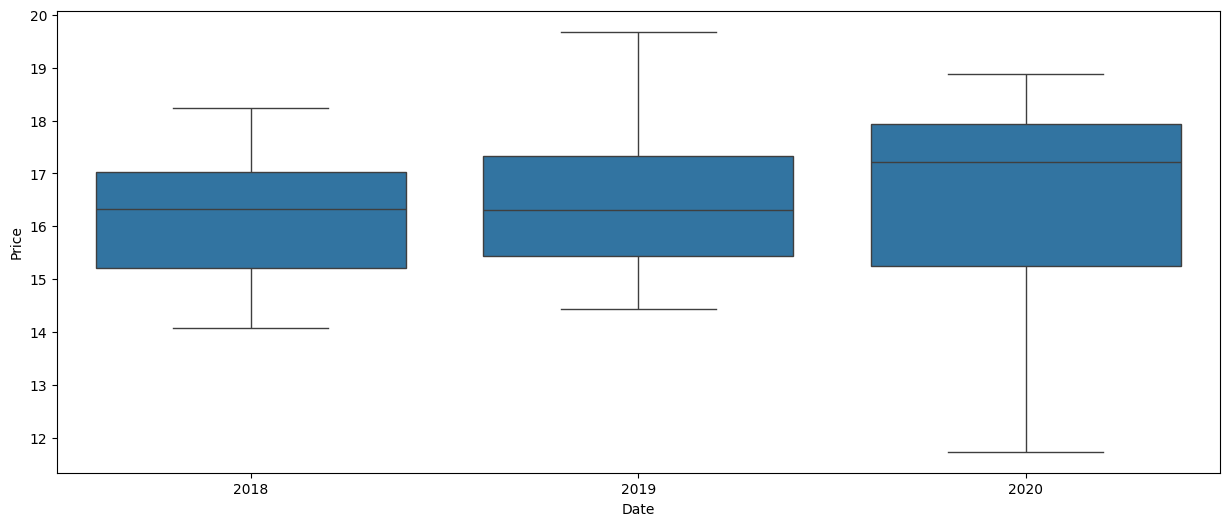

In [25]:
fig, ax = plt.subplots(figsize=(15,6))

# Replace 'Price' with the actual column name containing silver prices
sns.boxplot(x=stationary_check_silver_price.index.year, 
            y=stationary_check_silver_price['Price'], ax=ax)


### Decomposing using statsmodel:

The decomposition of time series shows a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns.                                                                     
With statsmodels we are be able to see the trend, seasonal, and residual components of our data.

In [26]:
decomposition = sm.tsa.seasonal_decompose(stationary_check_silver_price, model='multiplicative', period=12)


In [27]:
stationary_check_silver_price = stationary_check_silver_price.asfreq('M').ffill()


In [28]:
stationary_check_silver_price = stationary_check_silver_price.asfreq('M').interpolate(method='linear')


In [29]:
stationary_check_silver_price = stationary_check_silver_price.asfreq('M').dropna()


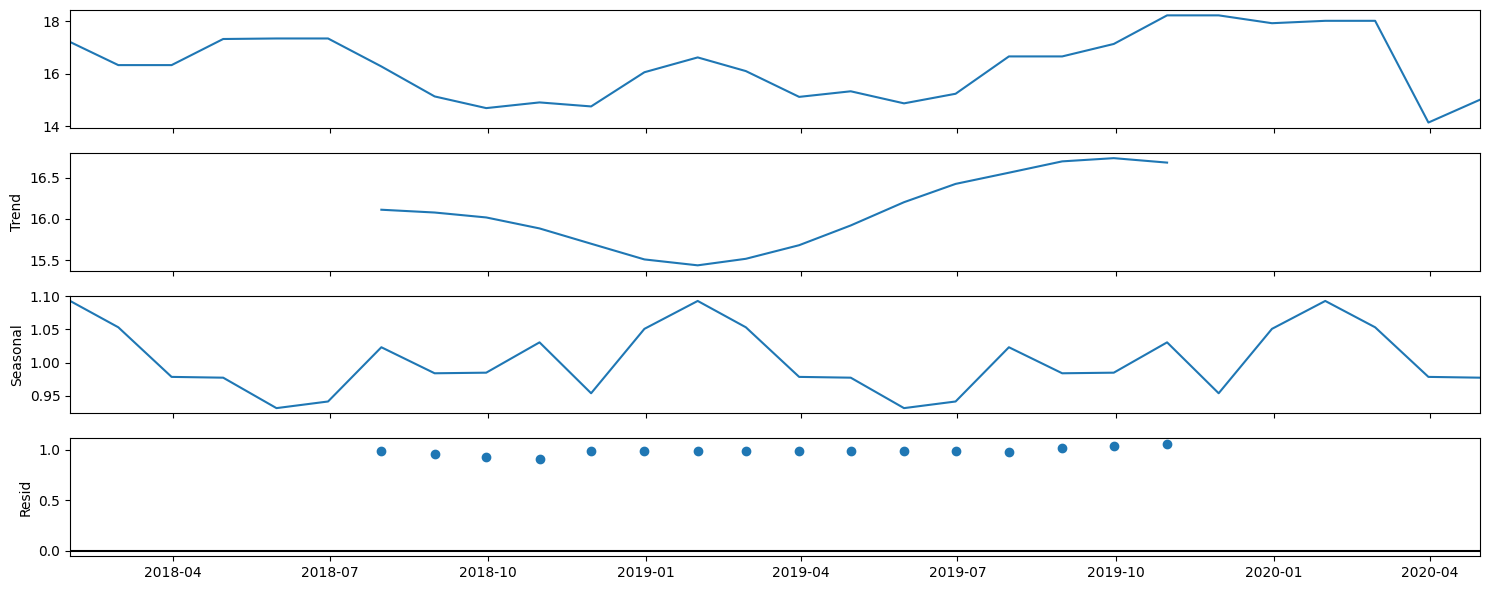

In [30]:
# Ensure the index is datetime
stationary_check_silver_price.index = pd.to_datetime(stationary_check_silver_price.index)

# Set frequency and fill missing values
stationary_check_silver_price = stationary_check_silver_price.asfreq('M').ffill()  # Use .interpolate() if needed

# Perform decomposition with period set
decomposition = sm.tsa.seasonal_decompose(stationary_check_silver_price, model='multiplicative', period=12)
fig = decomposition.plot()
plt.show()


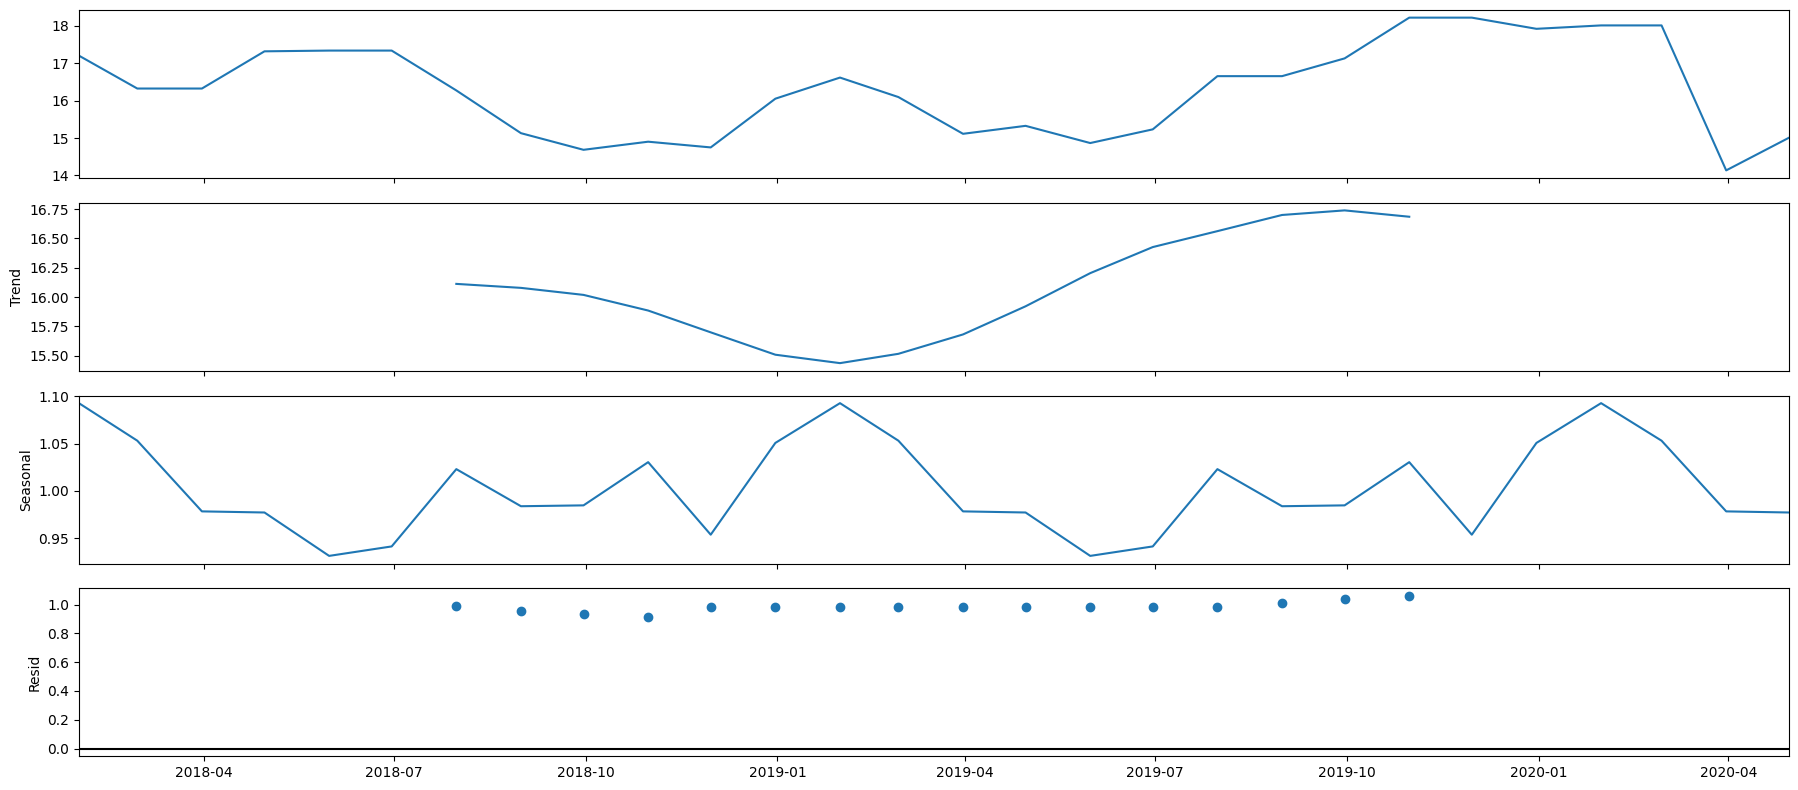

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(stationary_check_silver_price, model='multiplicative')
fig = decomposition.plot()
plt.show()

# Stationarity

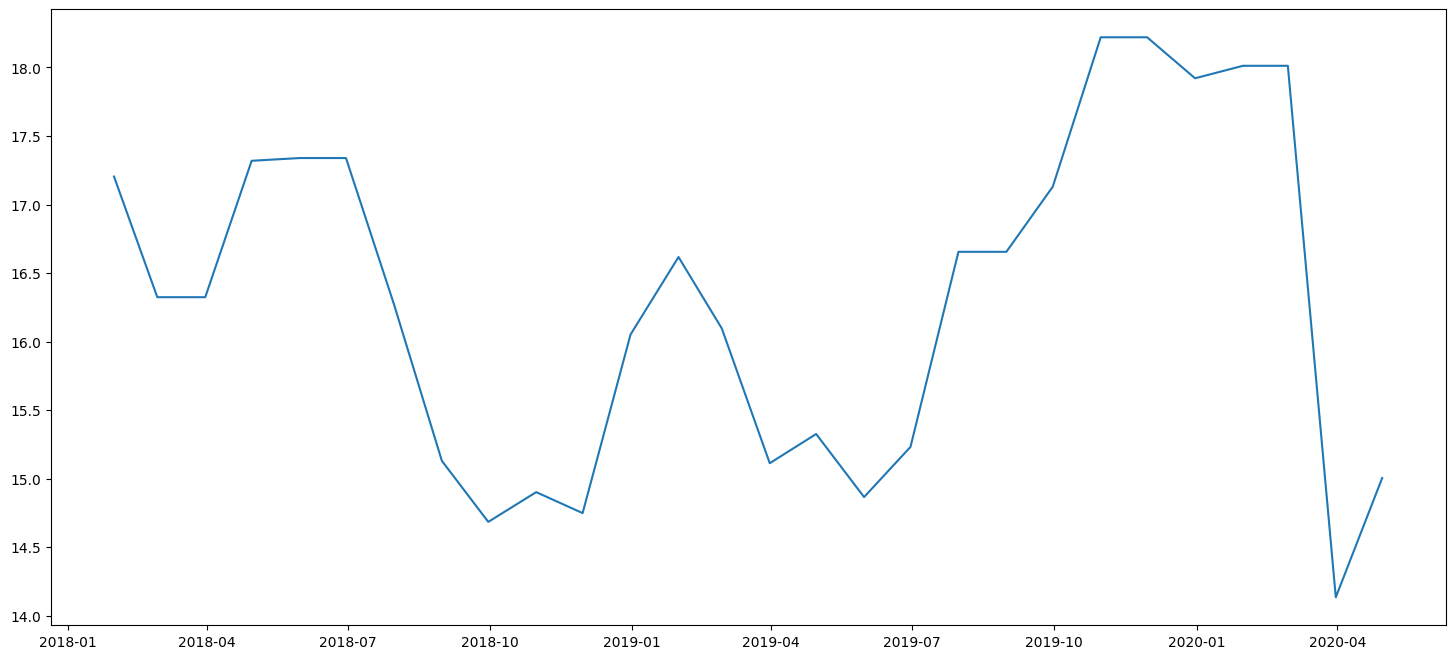

In [32]:
plt.plot(stationary_check_silver_price)

# Checking stationarity

We can check stationarity using the following:                                                                                 
1.ACF and PACF plots                                                                                                           
2.Plotting Rolling Statistics                                                                                                   
3.Augmented Dickey-Fuller Test

### ACF and PACF plots

Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots

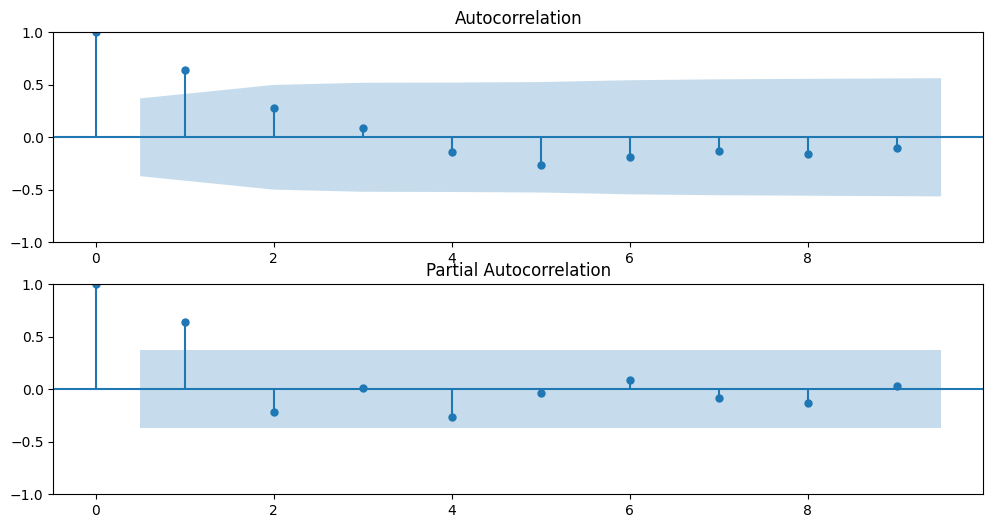

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Get the number of available data points
n_obs = len(stationary_check_silver_price)

# Set a reasonable number of lags (N/3 or at least 10)
max_lags = min(n_obs // 3, 30)  # Ensure it's not more than 30

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(stationary_check_silver_price, ax=plt.gca(), lags=max_lags)
plt.subplot(212)
plot_pacf(stationary_check_silver_price, ax=plt.gca(), lags=max_lags)
plt.show()


This data is non-stationary as a high number of previous observations are correlated with future values.                          
Confidence intervals are drawn as a cone.                                                                                       
By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

### Plotting Rolling Statistics

We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)                
The time series is hence not stationary

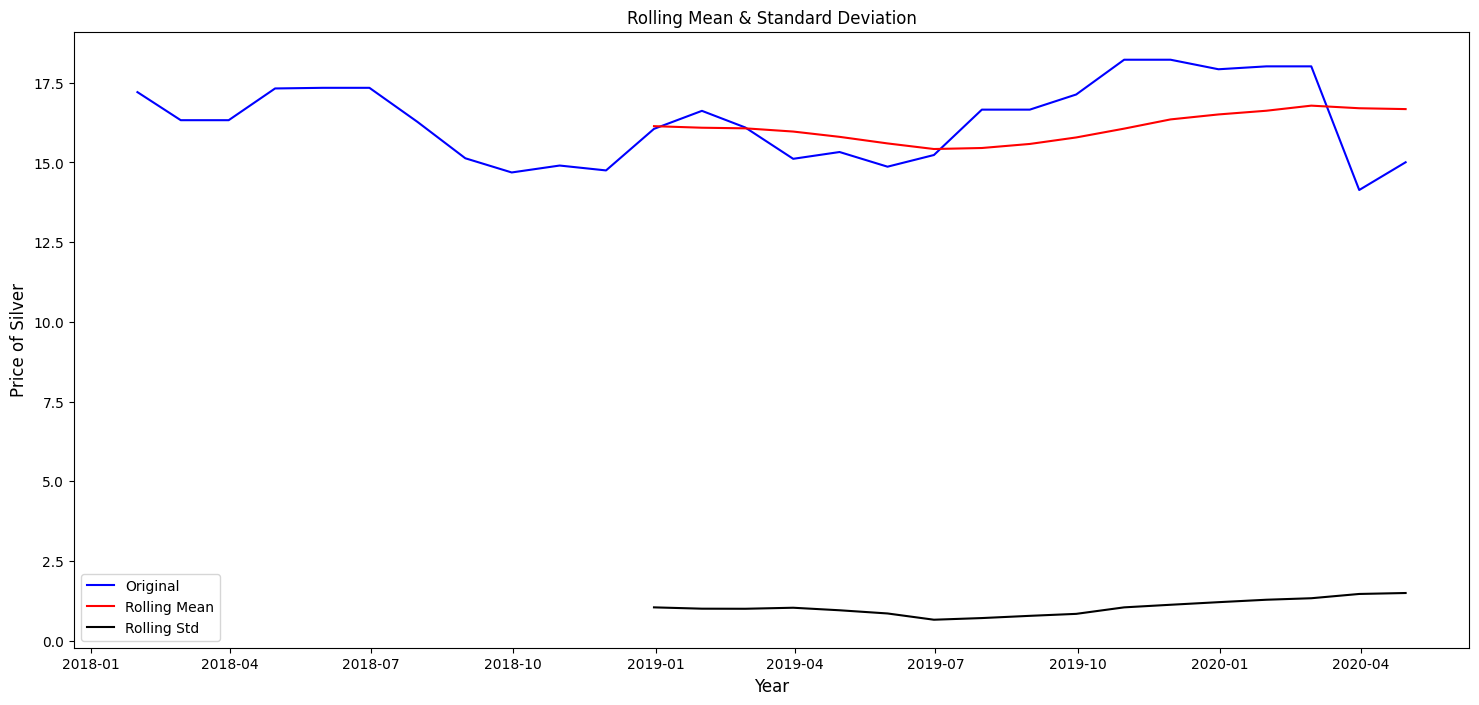

Results of Dickey-Fuller Test:
Test Statistic                 -2.186471
p-value                         0.211192
#Lags Used                      7.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, commodity):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel('Price of {}'.format(commodity), fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:' )
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(stationary_check_silver_price, 'Silver')

### Augmented Dickey-Fuller Test

Null hypothesis: The time series is not stationary                                                                             
Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(stationary_check_silver_price, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -2.186471
p-value                         0.211192
#Lags Used                      7.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


Though the variation in standard deviation is small, mean is clearly varying with time and this is not a stationary series. Also, the test statistic higher than the critical values, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

In [37]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Making Time Series Stationary

# Transformations

We can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:


### Log Scale Transformation

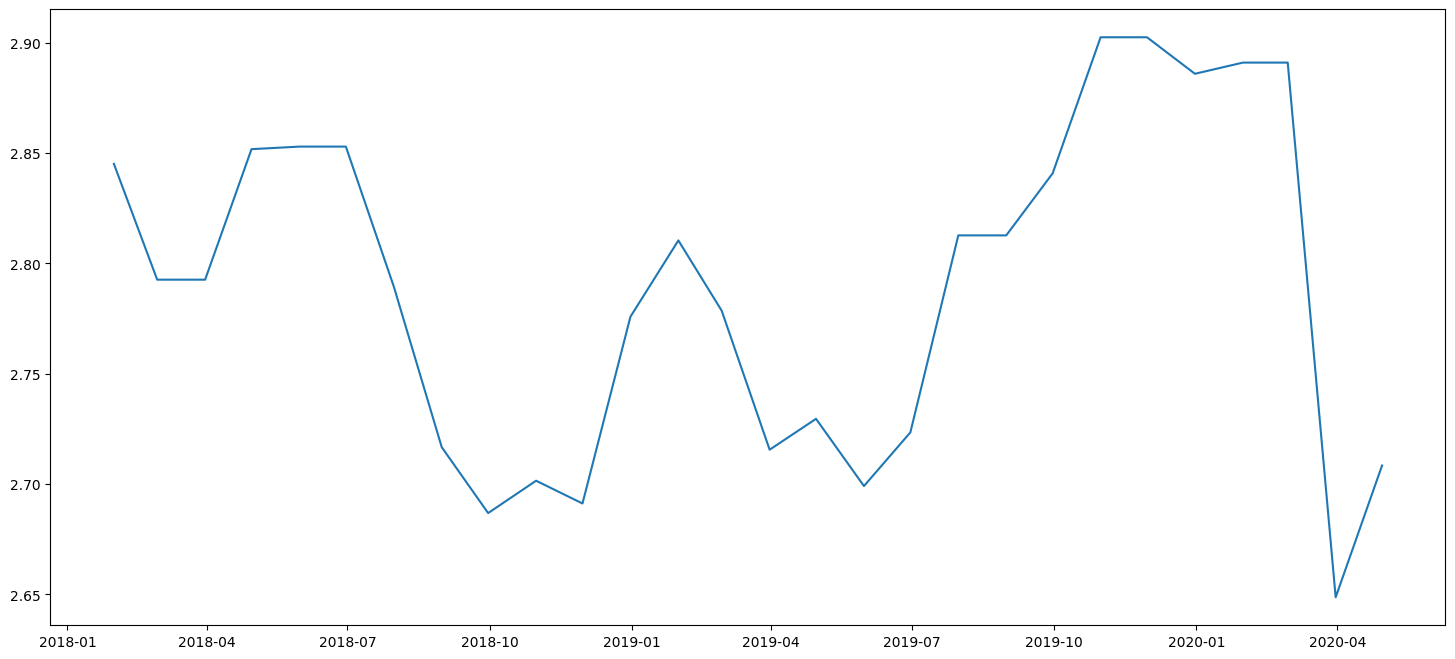

In [38]:
ts_log = np.log(stationary_check_silver_price)
plt.plot(ts_log)

## Techniques to remove Trend - Smoothing


### Moving Average

Make It Stationary Mehtod 1 - Moving Average [Eliminate Trend Only]

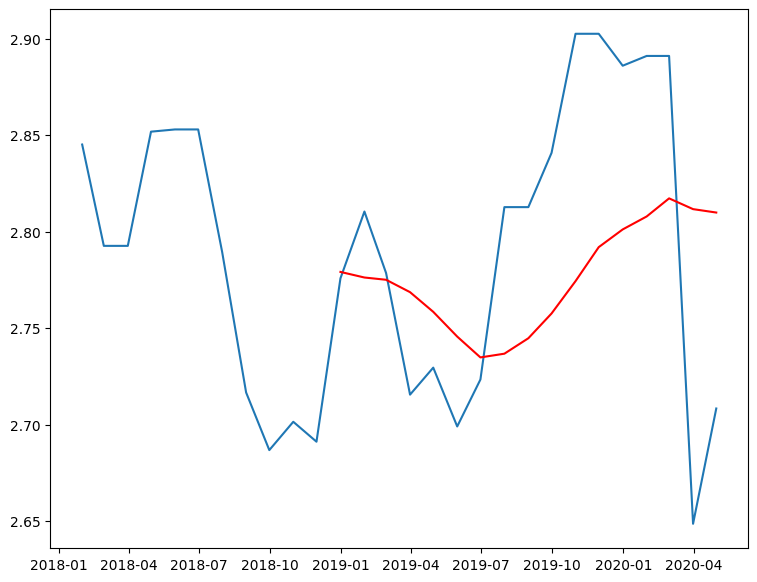

In [39]:
moving_avg = ts_log.rolling(window=12,center=False).mean()  # taking average of LAST 2 years (36-12) values
plt.figure(figsize=(9,7))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [40]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)   # rolling mean is not defined in the first 12 values, it's YEARLY average

,Price
Date,
2018-01-31,NaN
2018-02-28,NaN
2018-03-31,NaN
2018-04-30,NaN
2018-05-31,NaN
2018-06-30,NaN
2018-07-31,NaN
2018-08-31,NaN
2018-09-30,NaN


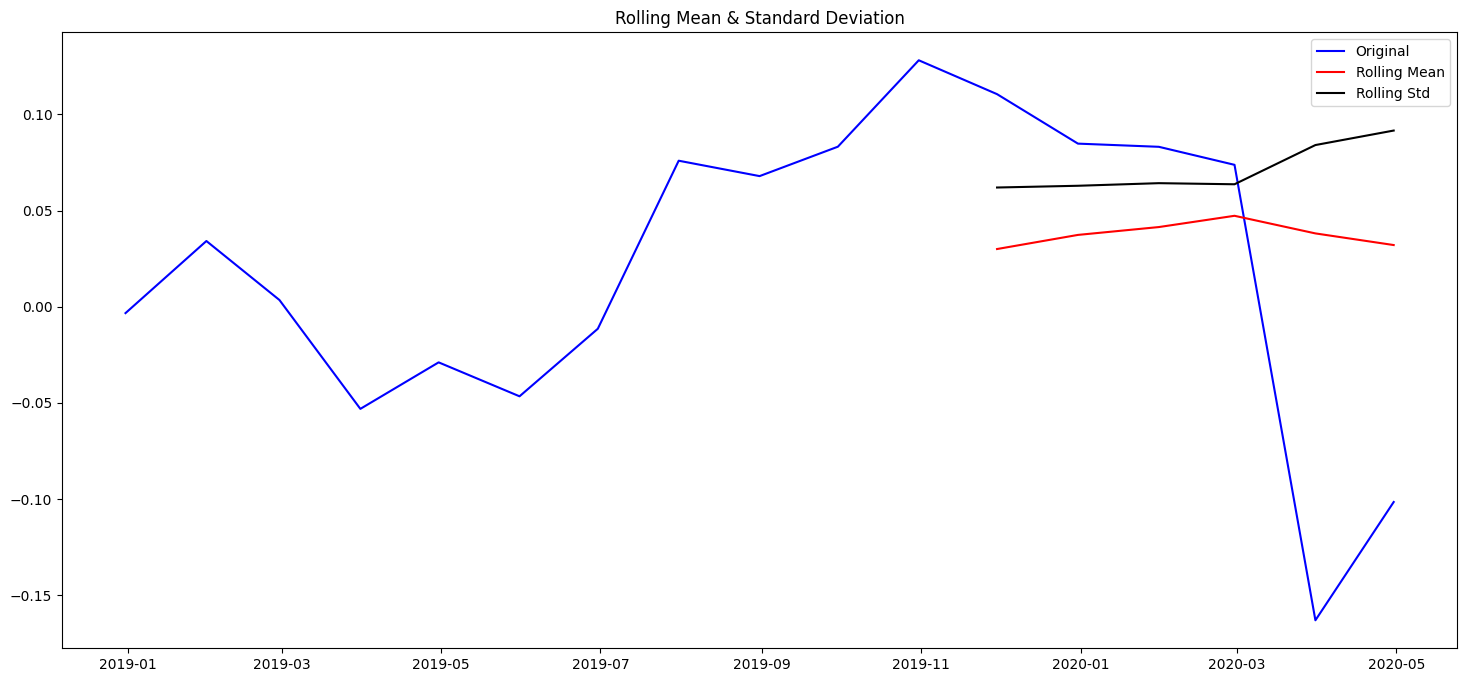

Results of Dickey-Fuller Test:
Test Statistic                 -2.515858
p-value                         0.111664
#Lags Used                      4.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [41]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

## Weighted Moving Average

Make It Stationary Mehtod 2 - Weighted Moving Average [Eliminate Trend Only]

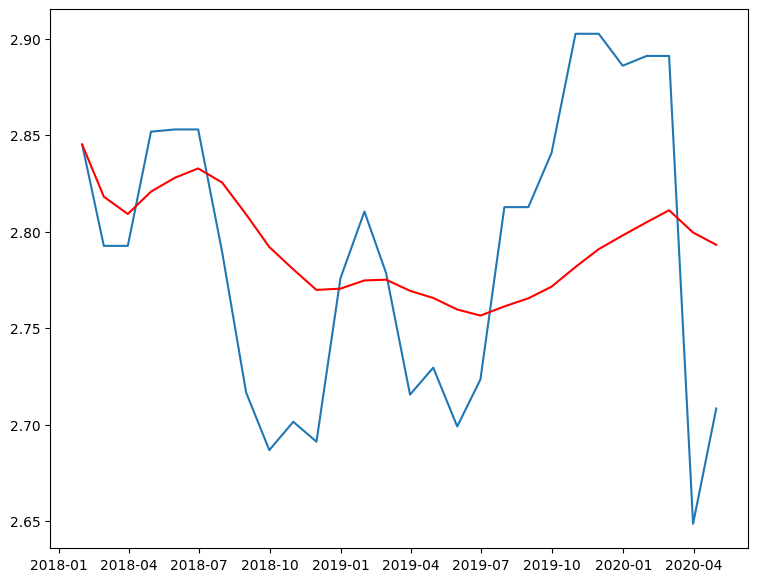

In [42]:
expwighted_avg = ts_log.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
plt.figure(figsize=(9,7))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

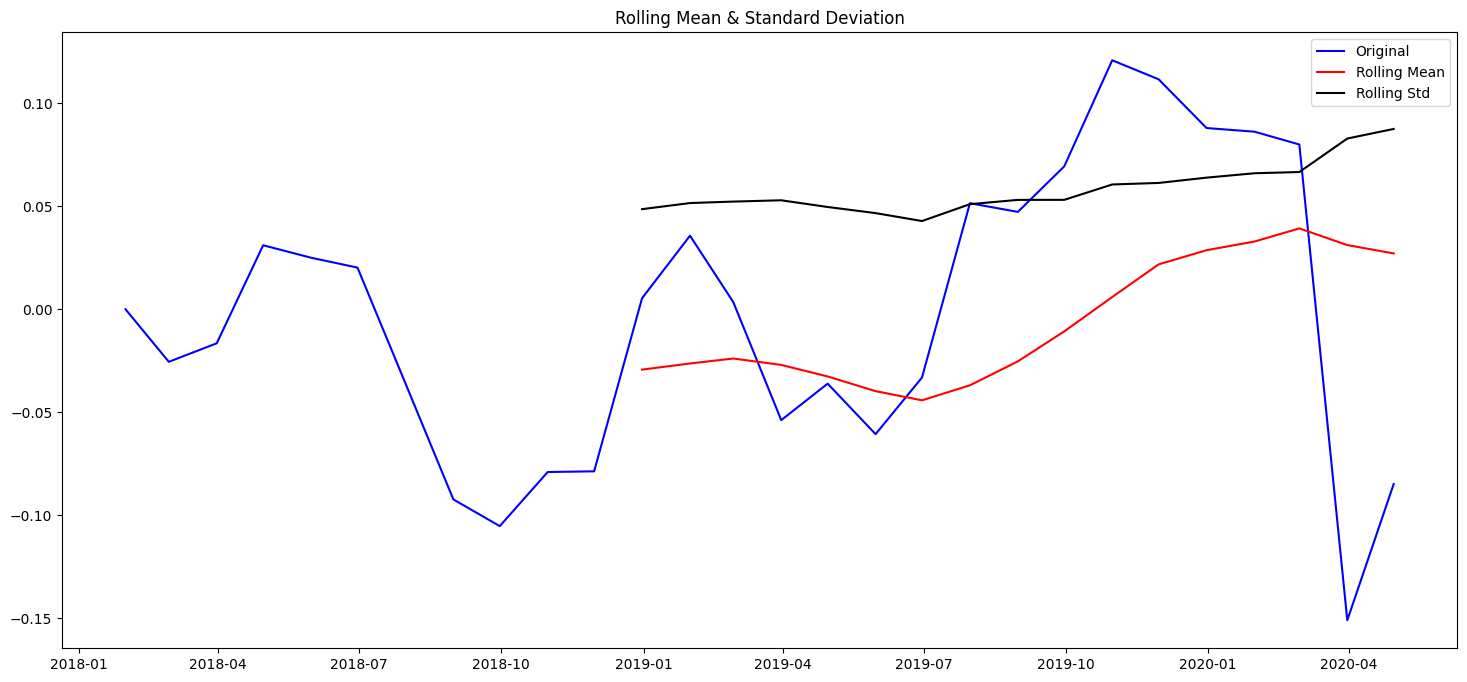

Results of Dickey-Fuller Test:
Test Statistic                 -2.142859
p-value                         0.227633
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [43]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

#### Make It Stationary Method 3 [Eliminating Trend and Seasonality]                                                                 


Differencing – taking the differece with a particular time lag

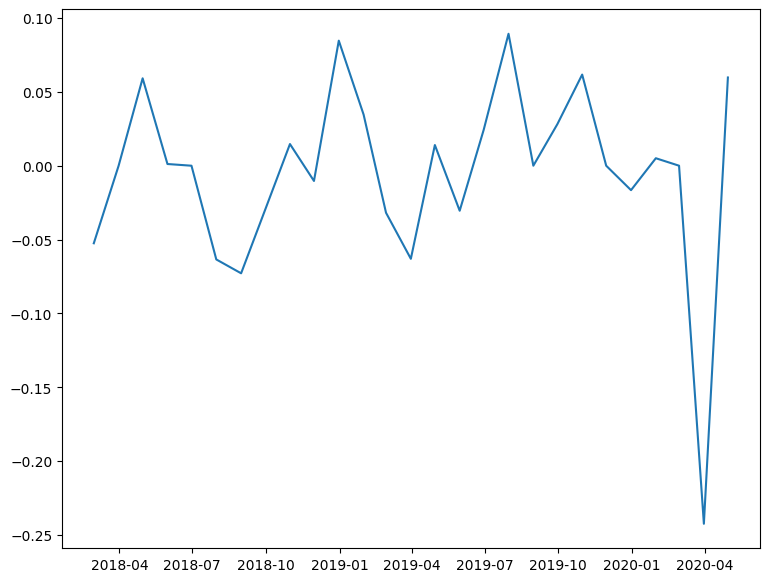

In [44]:
ts_log_diff = ts_log - ts_log.shift()
plt.figure(figsize=(9,7))
plt.plot(ts_log_diff)
plt.show()

In [45]:
ts_log_diff.head()

,Price
Date,
2018-01-31,NaN
2018-02-28,-0.052505
2018-03-31,0.000000
2018-04-30,0.059168
2018-05-31,0.001154


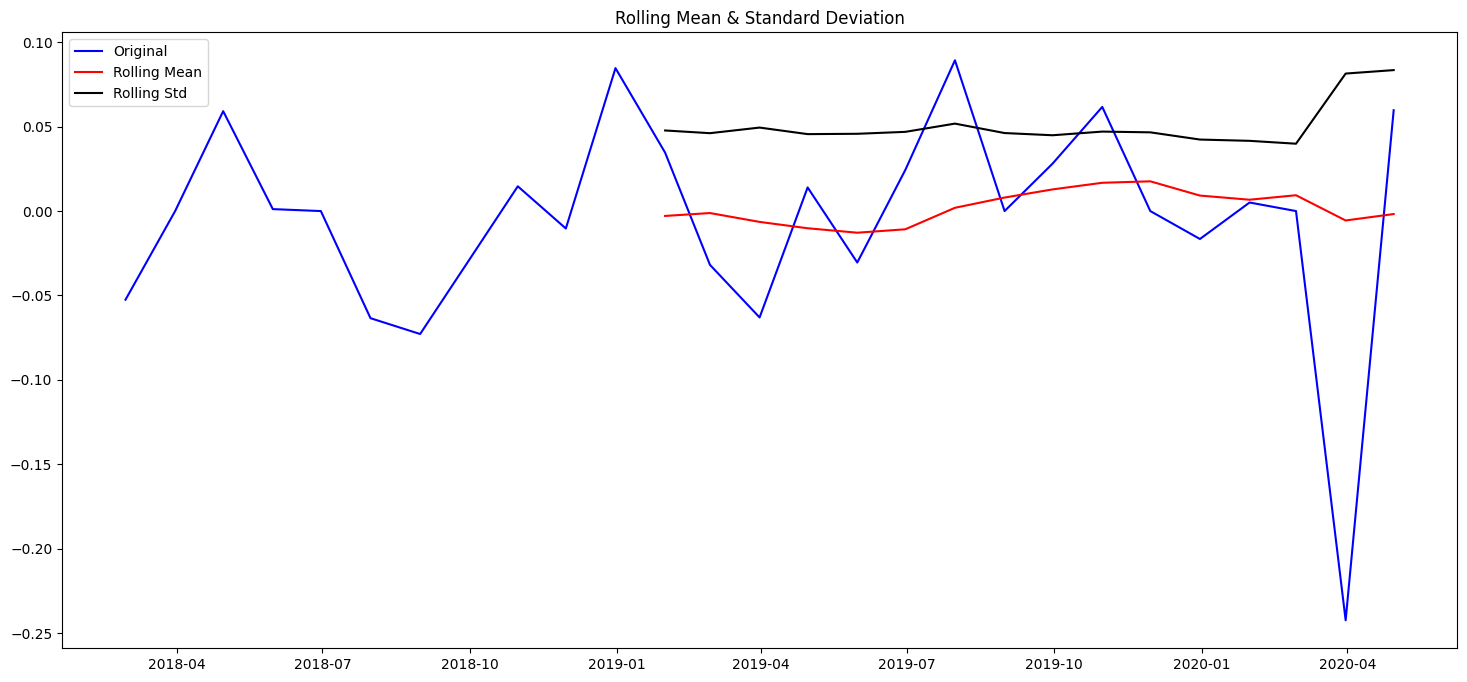

Results of Dickey-Fuller Test:
Test Statistic                 -1.590838
p-value                         0.488194
#Lags Used                      7.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [46]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# It's better than the above 2 methods (for this case), basde on the plot
# Although Test Statistics is still higher than all the  Critical Value, it's closer

#### Make It Stationary Method 4 [Eliminating Trend and Seasonality]

Decoposing - trend and seasonality are modeled separately and the remaining part of the series is returned

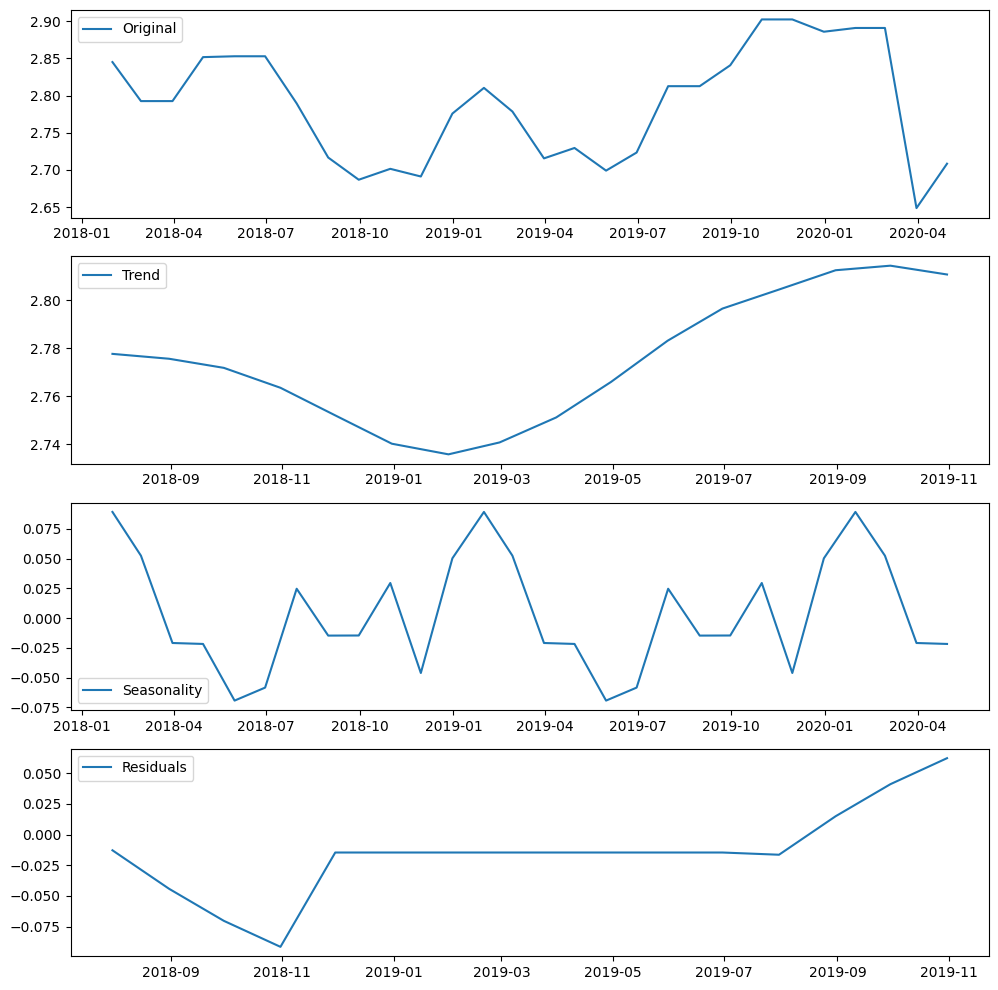

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# trend, seasonality are separated out from data, and we can model the residuals
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

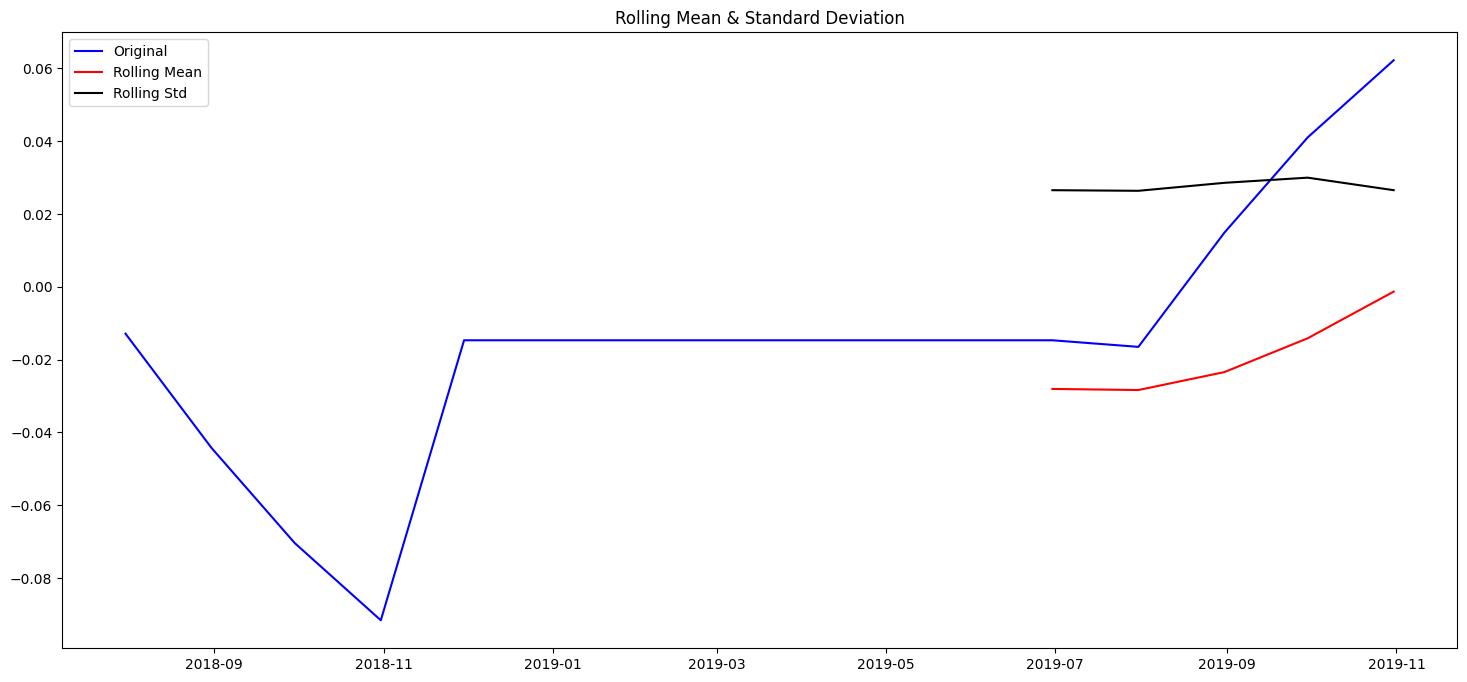

Results of Dickey-Fuller Test:
Test Statistic                 -0.643650
p-value                         0.860811
#Lags Used                      2.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


In [48]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### ARIMA Model 

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   28
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -35.621
Date:                Sat, 15 Feb 2025   AIC                             83.243
Time:                        16:42:30   BIC                             91.018
Sample:                    01-31-2018   HQIC                            85.555
                         - 04-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0814      0.311     -0.261      0.794      -0.692       0.529
ar.L2         -0.1563      0.502     -0.311      0.756      -1.141       0.828
ar.L3          0.0402      0.386      0.104      0.9

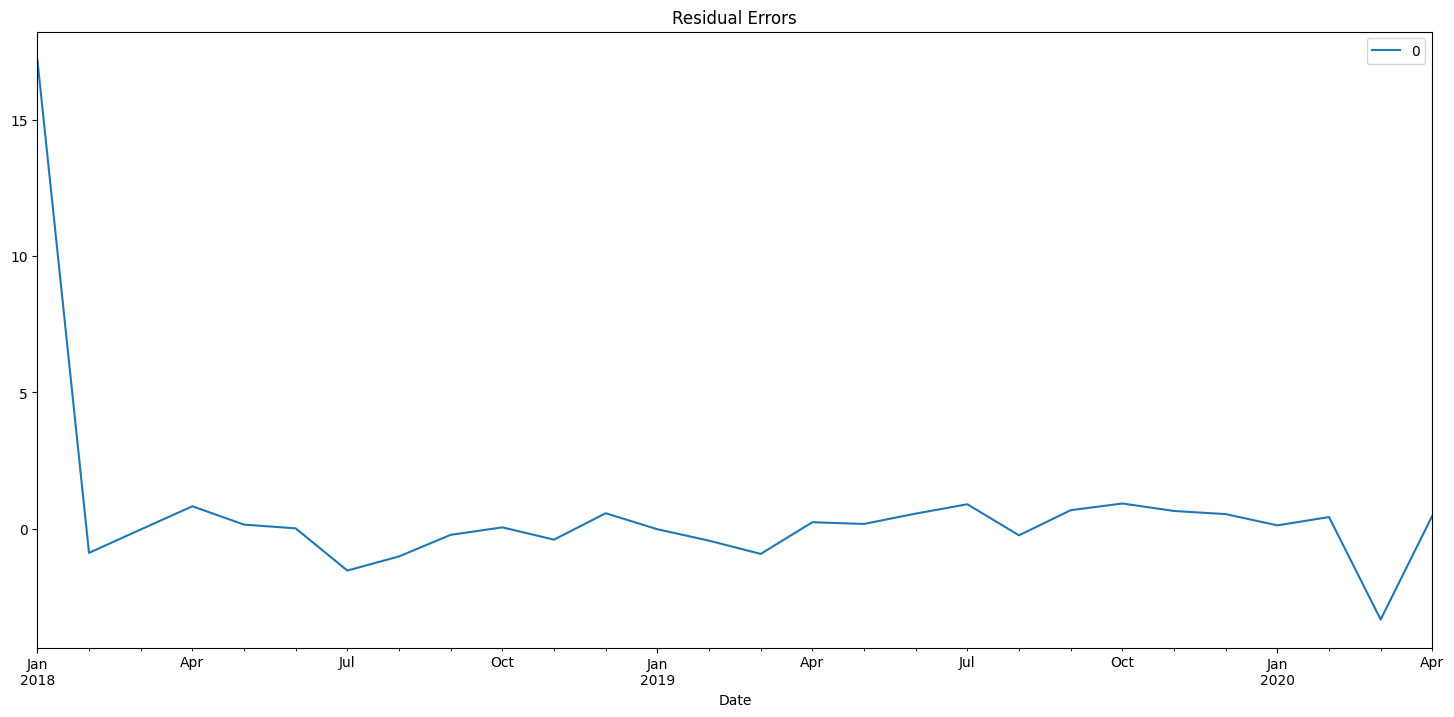

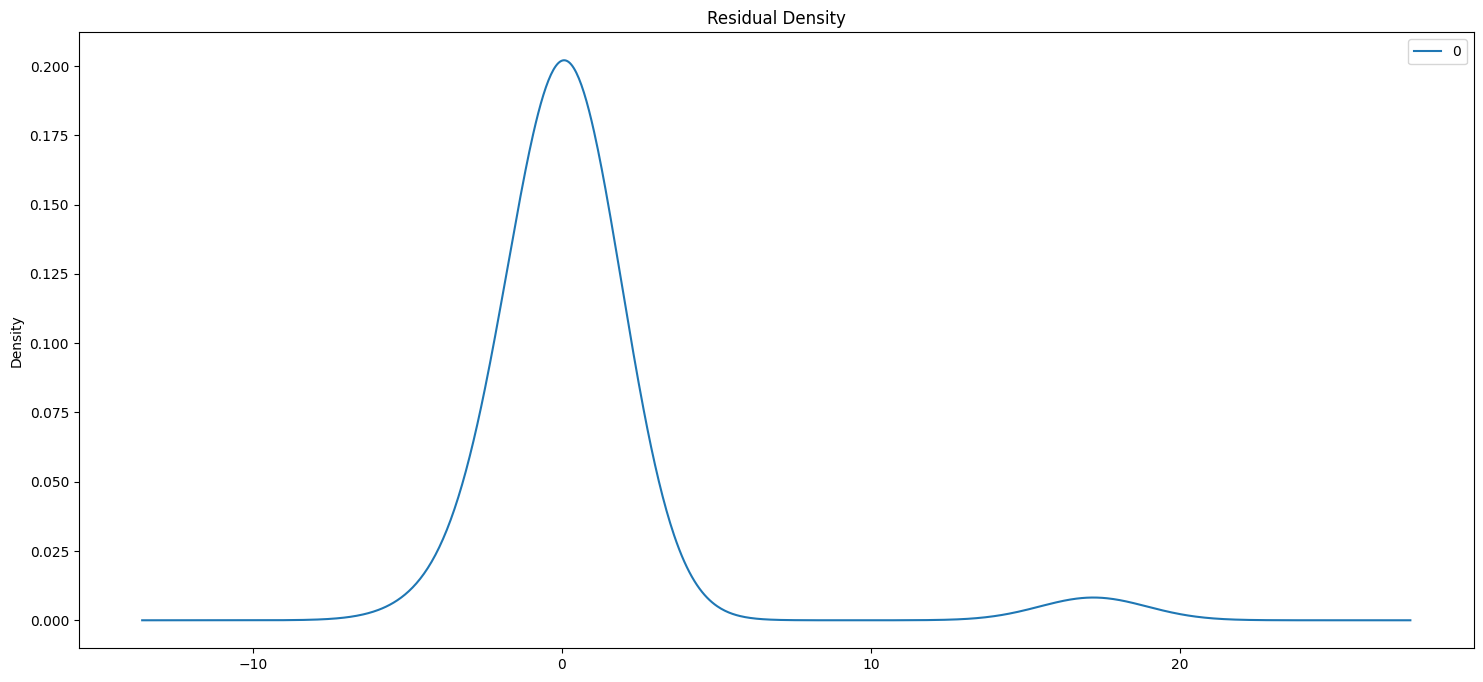

               0
count  28.000000
mean    0.556938
std     3.380289
min    -3.323079
25%    -0.276644
50%     0.142055
75%     0.562789
max    17.204000


In [49]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Fit ARIMA model
model = ARIMA(stationary_check_silver_price, order=(5,1,0))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residual Errors")
plt.show()

residuals.plot(kind='kde', title="Residual Density")
plt.show()

print(residuals.describe())


In [50]:
stationary_check_silver_price.values

array([[17.204],
       [16.324],
       [16.324],
       [17.319],
       [17.339],
       [17.339],
       [16.273],
       [15.13 ],
       [14.685],
       [14.902],
       [14.749],
       [16.052],
       [16.617],
       [16.096],
       [15.113],
       [15.326],
       [14.866],
       [15.232],
       [16.655],
       [16.655],
       [17.13 ],
       [18.22 ],
       [18.22 ],
       [17.921],
       [18.012],
       [18.012],
       [14.135],
       [15.005]])

Predicted=16.953, Expected=16.655
Predicted=16.199, Expected=17.130
Predicted=16.927, Expected=18.220
Predicted=17.523, Expected=18.220
Predicted=17.713, Expected=17.921
Predicted=17.774, Expected=18.012
Predicted=17.637, Expected=18.012
Predicted=17.801, Expected=14.135
Predicted=13.715, Expected=15.005
Test MSE: 2.051


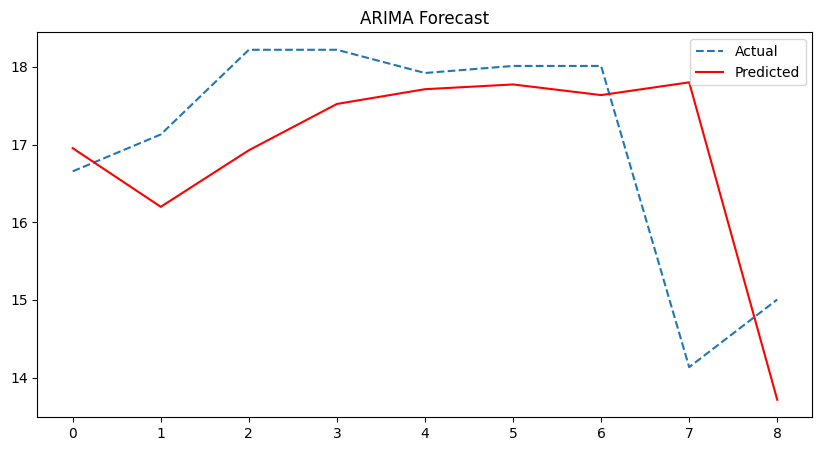

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Ensure stationary_check_silver_price is a NumPy array
if isinstance(stationary_check_silver_price, pd.Series):
    X = stationary_check_silver_price.values  # Convert Series to NumPy array
elif isinstance(stationary_check_silver_price, pd.DataFrame):
    X = stationary_check_silver_price.iloc[:, 0].values  # Take the first column

# Train-test split (70% train, 30% test)
size = int(len(X) * 0.7)
train, test = X[:size], X[size:]

# Convert train set to list for iterative forecasting
history = list(train)
predictions = []

# Walk-forward validation
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(5,1,0))  # Consider tuning (p,d,q)
        model_fit = model.fit()
        y_pred = model_fit.forecast(steps=1)[0]  # Ensure correct extraction
        predictions.append(y_pred)

        obs = test[t]
        history.append(obs)  # Append actual observation

        print(f'Predicted={y_pred:.3f}, Expected={obs:.3f}')  # Cleaner formatting
    except Exception as e:
        print(f"Error at step {t}: {e}")
        break

# Compute MSE
error = mean_squared_error(test, predictions)
print(f'Test MSE: {error:.3f}')

# Plot the forecast
plt.figure(figsize=(10,5))
plt.plot(test, label="Actual", linestyle="dashed")
plt.plot(predictions, color='red', label="Predicted")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


#### try ARIMA model on differenting output, since it gave best result above

In [53]:
from statsmodels.tsa.stattools import acf, pacf

# Set nlags to min(20, len(ts_log_diff) // 2)
max_lags = min(20, len(ts_log_diff) // 2)

lag_acf = acf(ts_log_diff, nlags=max_lags)
lag_pacf = pacf(ts_log_diff, nlags=max_lags, method='ols')


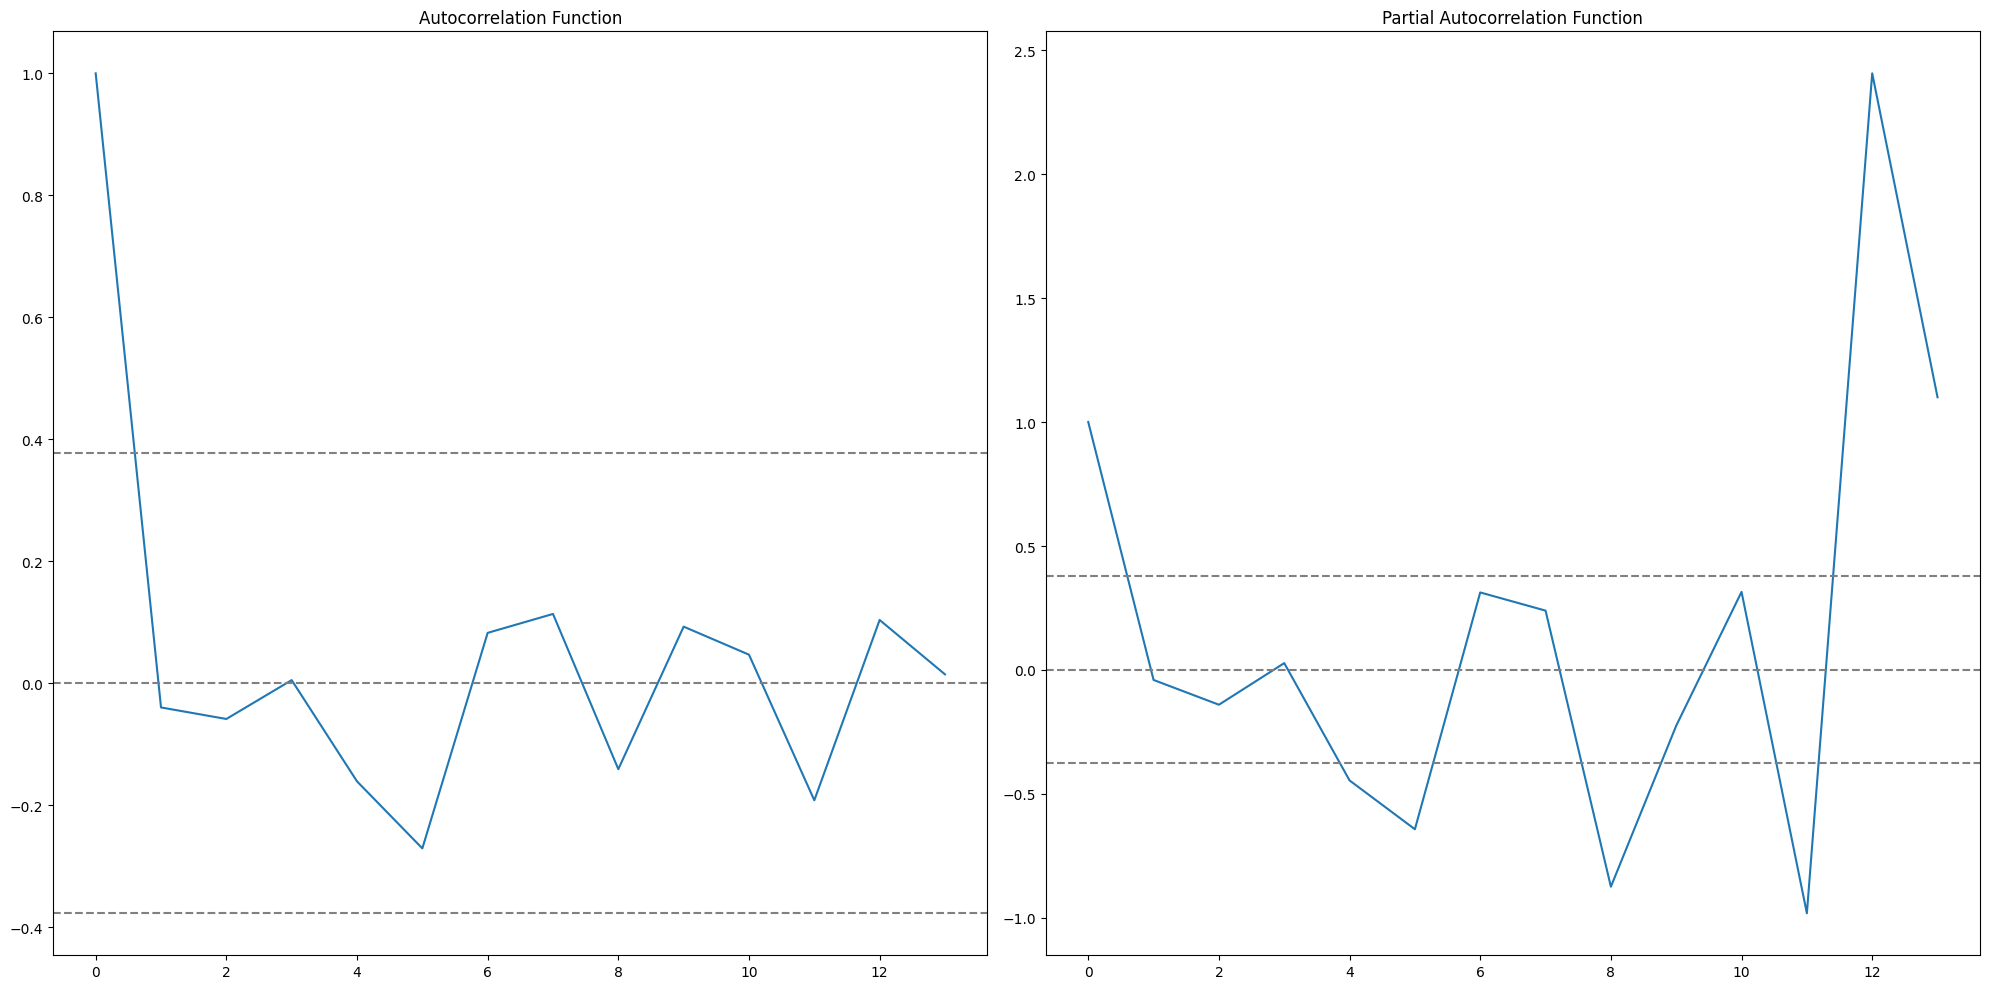

In [54]:
plt.figure(figsize=(20,10))

#Plot ACF: 
## q – The lag value where the ACF chart crosses the upper confidence interval for the first time (in this case q=1)
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
## p – The lag value where the PACF chart crosses the upper confidence interval for the first time (in this case p=1)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

TypeError: unsupported format string passed to Series.__format__

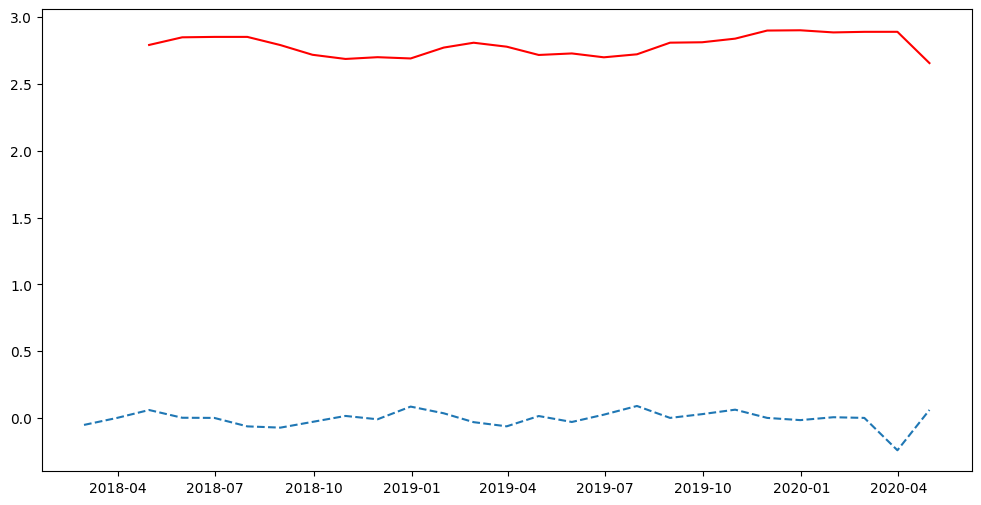

In [61]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure ts_log_diff is correctly computed
ts_log_diff = ts_log.diff().dropna()

# Fit ARIMA model (differencing is handled internally)
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit()

# Get fitted values with correct index alignment
fitted_values = results_AR.predict(start=2, end=len(ts_log))  # Adjusted index alignment

# Align fitted values with ts_log_diff to avoid shape mismatch
fitted_values = fitted_values.iloc[1:].reindex(ts_log_diff.index)  # Ensure proper alignment

# Compute RSS, ensuring no NaN values
rss = ((fitted_values - ts_log_diff) ** 2).dropna().sum()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(ts_log_diff, label="Original Differenced Data", linestyle="dashed")
plt.plot(fitted_values, color='red', label="Fitted Values")
plt.title(f'Residual Sum of Squares (RSS): {rss:.4f}')
plt.legend()
plt.show()


TypeError: unsupported format string passed to Series.__format__

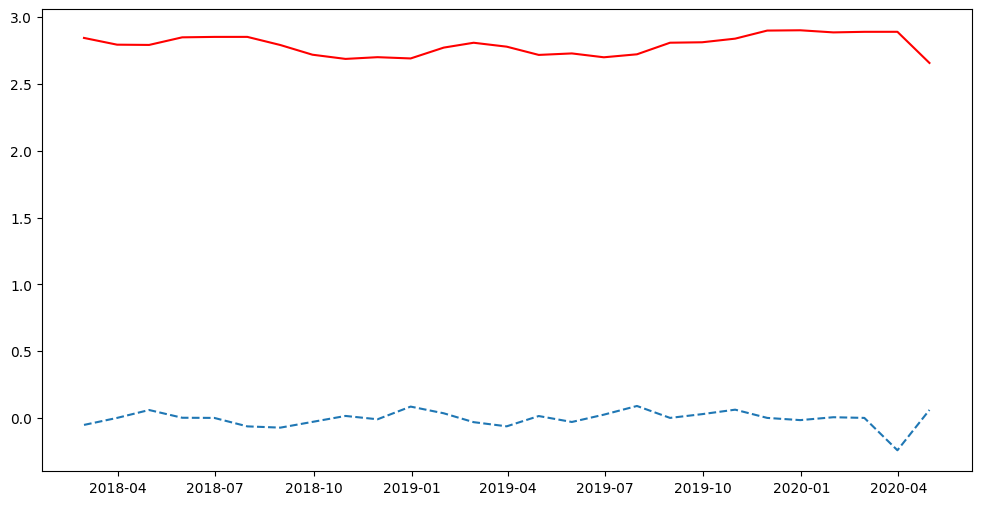

In [66]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# MA Model (Moving Average)
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit()

# Use predict() instead of fittedvalues to get better-aligned predictions
fitted_values = results_MA.predict(start=ts_log_diff.index[0], end=ts_log_diff.index[-1])

# Ensure index alignment to avoid mismatches
fitted_values = fitted_values.reindex(ts_log_diff.index)

# Compute RSS safely, ensuring no NaN values
rss = ((fitted_values - ts_log_diff) ** 2).dropna().sum()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(ts_log_diff, label="Original Differenced Data", linestyle="dashed")
plt.plot(fitted_values, color='red', label="Fitted Values")
plt.title(f'Residual Sum of Squares (RSS): {rss:.4f}')
plt.legend()
plt.show()


TypeError: unsupported format string passed to Series.__format__

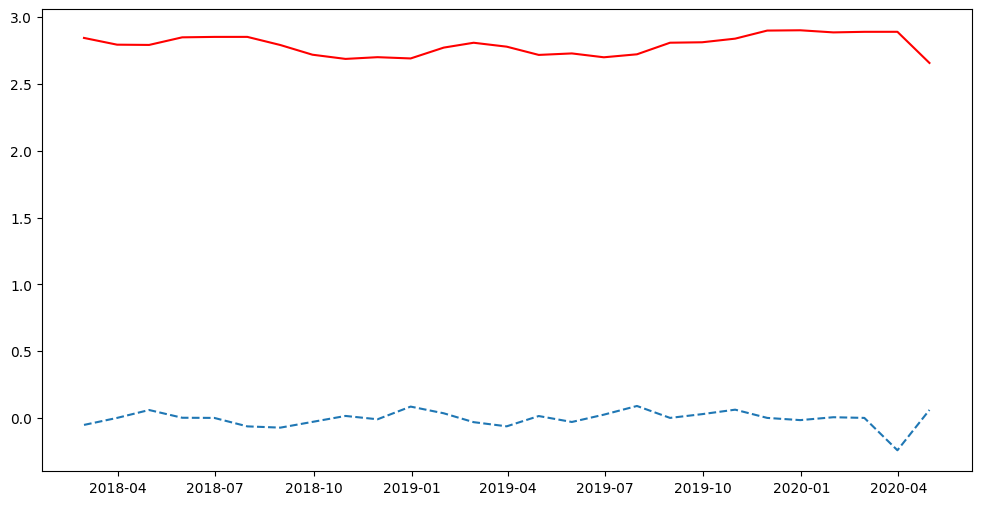

In [65]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# MA Model (Moving Average)
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit()

# Align fitted values with ts_log_diff to ensure no index mismatch
fitted_values = results_MA.fittedvalues.reindex(ts_log_diff.index)

# Compute RSS safely, ensuring no NaN values
rss = ((fitted_values - ts_log_diff) ** 2).dropna().sum()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(ts_log_diff, label="Original Differenced Data", linestyle="dashed")
plt.plot(fitted_values, color='red', label="Fitted Values")
plt.title(f'Residual Sum of Squares (RSS): {rss:.4f}')
plt.legend()
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

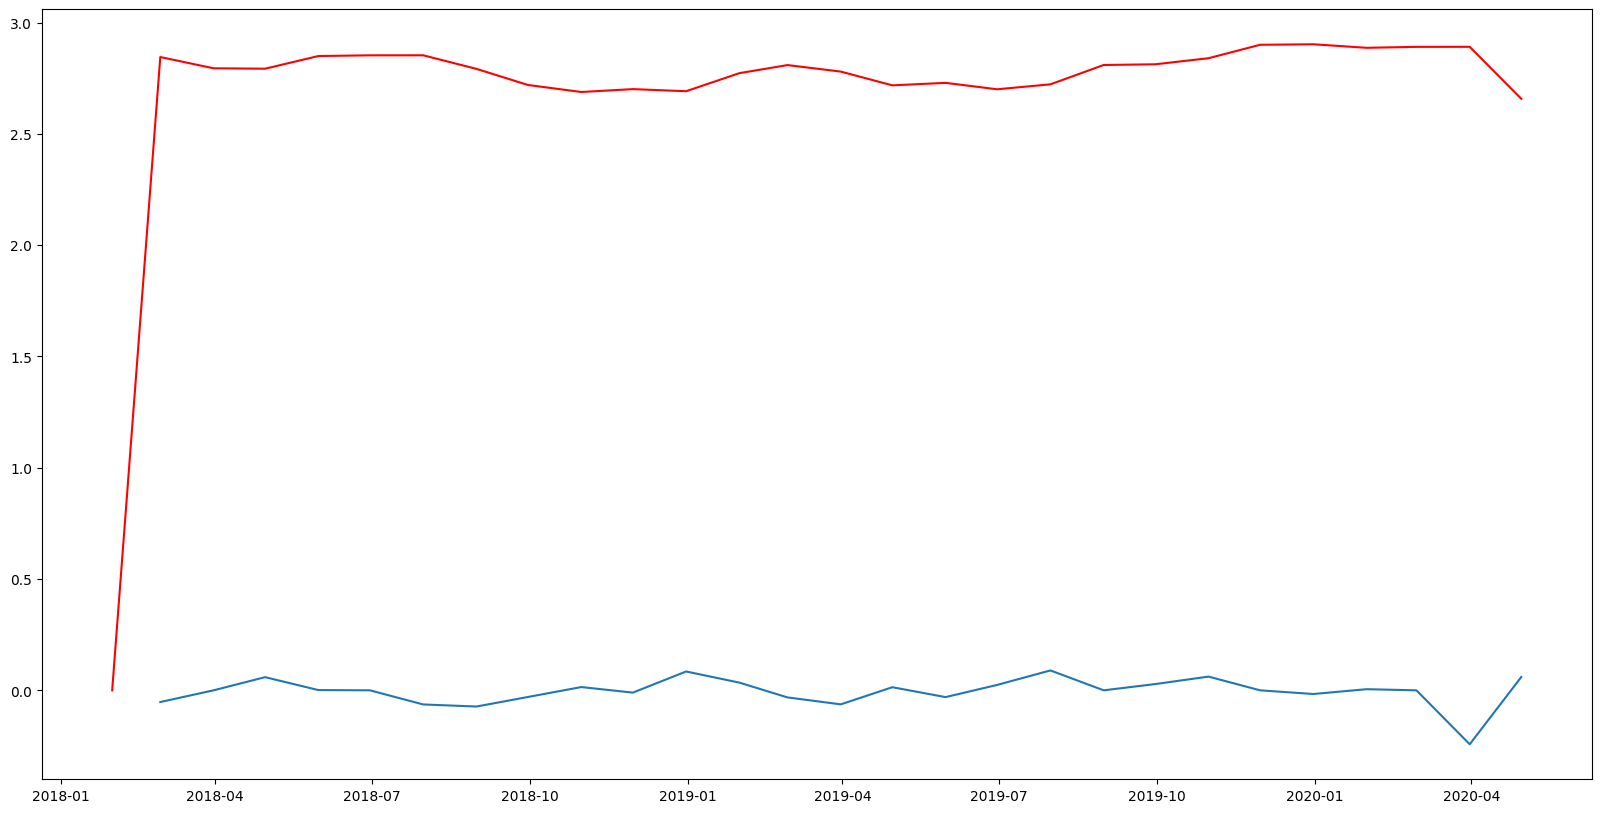

In [64]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# MA Model
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit()  # Remove 'disp' argument

# Plot results
plt.figure(figsize=(20, 10))
plt.plot(ts_log_diff, label="Original")
plt.plot(results_MA.fittedvalues, color='red', label="Fitted")
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - ts_log_diff) ** 2))
plt.legend()
plt.show()


c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


TypeError: unsupported operand type(s) for +: 'int' and 'str'

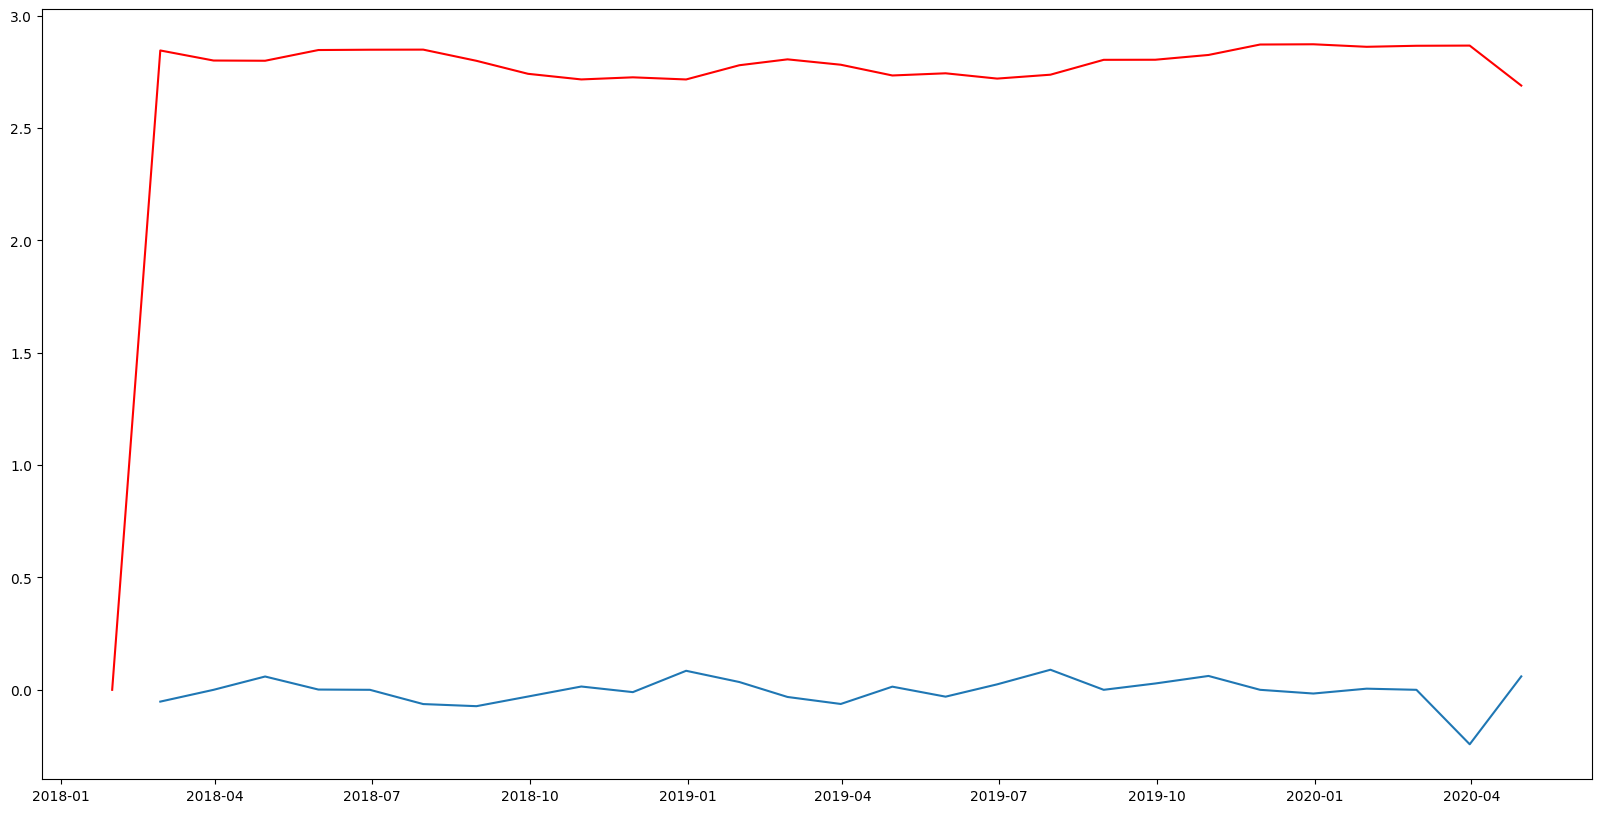

In [67]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Combined ARIMA Model
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit()  # Removed 'disp' argument

# Plot results
plt.figure(figsize=(20, 10))
plt.plot(ts_log_diff, label="Original")
plt.plot(results_ARIMA.fittedvalues, color='red', label="Fitted")
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - ts_log_diff) ** 2))
plt.legend()
plt.show()


In [68]:

# As we can see based on RSS (sum of resuduals)
## Scale back to original value, and see how this combined value performs

# Step 1 - store predicted result as seperated result
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

# start with 1901-02-01 is because we took the lag by 1, first element has nothing to subtract

Date
2018-01-31    0.000000
2018-02-28    2.845142
2018-03-31    2.800362
2018-04-30    2.799371
2018-05-31    2.847088
Freq: ME, dtype: float64


In [69]:

# Step 2 - Convert the differencing to log scale
## Add these differences consecutively to the base number
## An easy way to do it is to first determine the cumulative sum at index and then add it to the base number

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2018-01-31     0.000000
2018-02-28     2.845142
2018-03-31     5.645504
2018-04-30     8.444875
2018-05-31    11.291963
Freq: ME, dtype: float64


In [70]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2018-01-31     0.000000
2018-02-28     2.845142
2018-03-31     5.645504
2018-04-30     8.444875
2018-05-31    11.291963
Freq: ME, dtype: float64

TypeError: unsupported operand type(s) for +: 'int' and 'str'

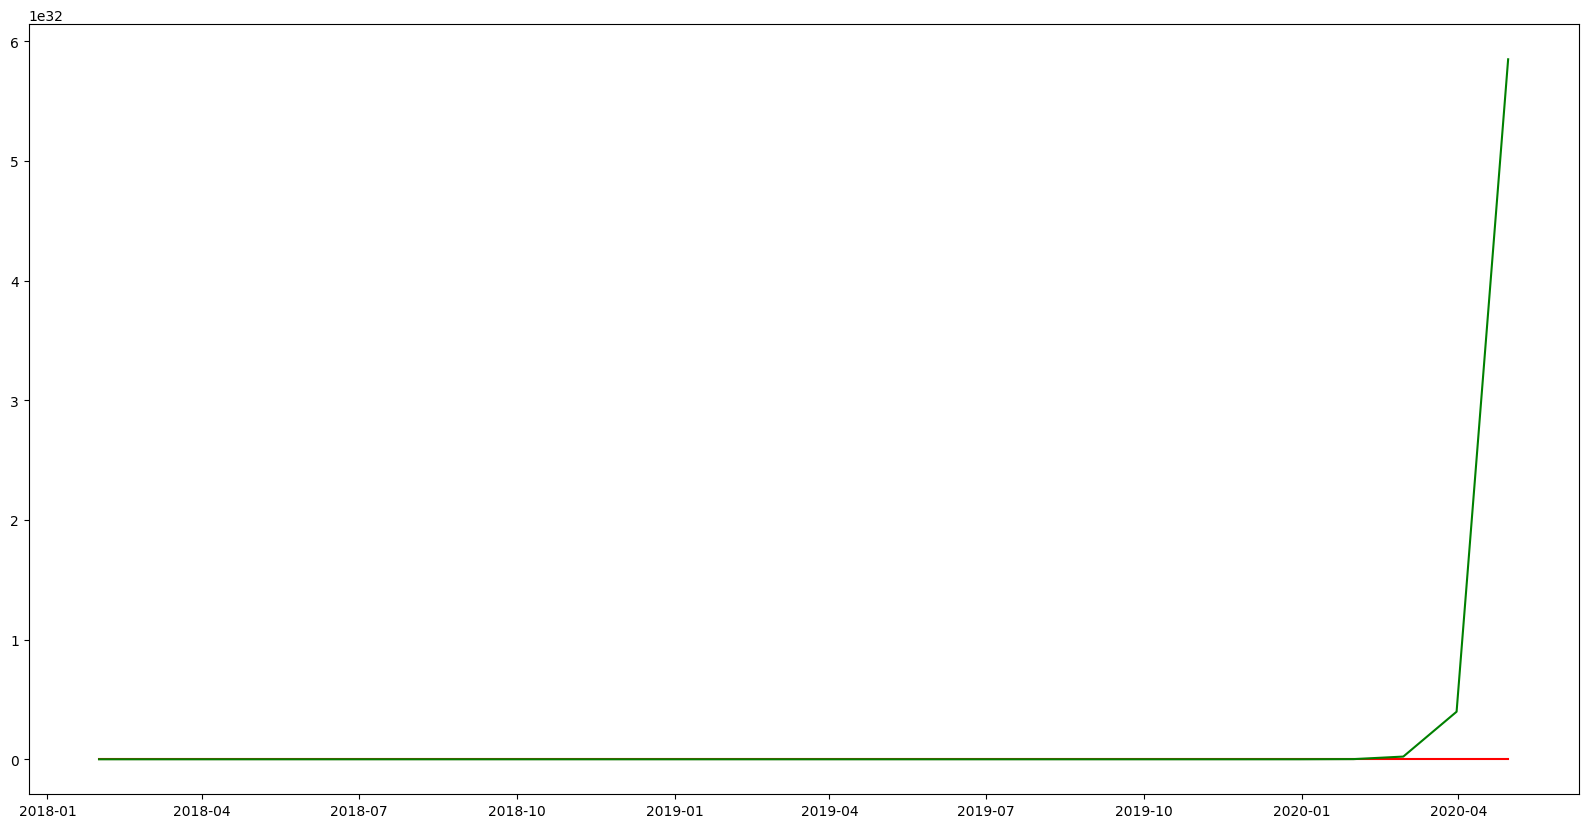

In [71]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(stationary_check_silver_price, color='red')
plt.plot(predictions_ARIMA, color='green')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-stationary_check_silver_price)**2)/len(stationary_check_silver_price)))
plt.show()

In [89]:
# The forecast result is not really good.... Maybe the training data needs more years

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import os

# Generate dummy dataset (replace with real data)
np.random.seed(42)
data = np.random.rand(100, 1)  # 100 samples, 1 feature

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

X, y = [], []
for i in range(10, len(data_scaled)):  # Creating sequences of 10 timesteps
    X.append(data_scaled[i-10:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshaping for LSTM

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X, y, epochs=10, batch_size=1, verbose=1)

# Save the Model
model.save('model_lstm.h5')
print("Model saved successfully as 'model_lstm.h5'.")

# Check if file exists
if os.path.exists("model_lstm.h5"):
    print("File exists. Now loading...")

    # Load the model
    loaded_model = load_model('model_lstm.h5')
    print("Model loaded successfully.")
else:
    print("Error: Model file not found!")

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1241
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1128
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0928
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1086
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0825
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0884
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0848
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0958
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0857
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0843


Model saved successfully as 'model_lstm.h5'.
File exists. Now loading...
Model loaded successfully.
